# HW3 : Logistic Regression and Neural Networks

### Instructions

The authoritative HW3 instructions are on the course website:

http://www.cs.tufts.edu/cs/135/2025s/hw3.html

Please report any questions to Piazza.

### Outline of this Notebook



In [69]:
import os
import numpy as np
import pandas as pd
import time
import warnings

In [70]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.0, style='whitegrid')

Allow autoreload of student-edited code to be reflected in this notebook

In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import LRGradientDescent 

insert_final_col_of_all_ones = LRGradientDescent.insert_final_col_of_all_ones
LogisticRegressionGradientDescent = LRGradientDescent.LogisticRegressionGradientDescent

# Create toy dataset with F=1 input dimension

Each input $x_n$ is one position on number line

Each label $y_n$ is binary, either 0 or 1

In [73]:
# Toy problem 
# Logistic regression should be able to perfectly predict all 10 examples
N = 10
xoffset = 1.23
x_NF = xoffset + np.hstack([
    np.linspace(-2, -1, 5), np.linspace(1, 2, 5)])[:,np.newaxis]
y_N = np.hstack([np.zeros(5), np.ones(5)])


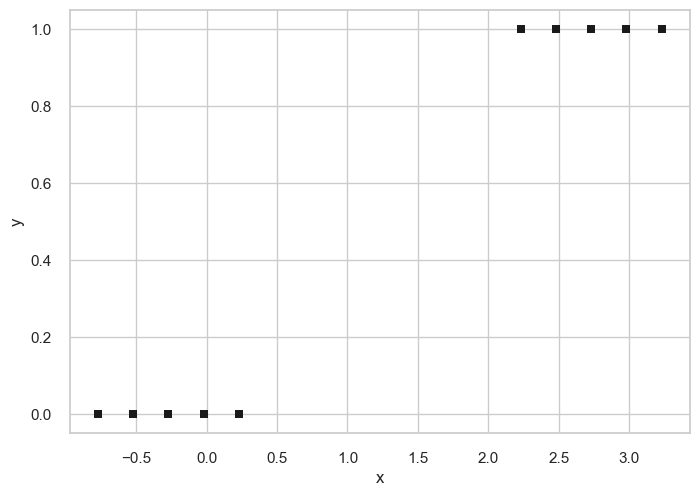

In [74]:
plt.plot(x_NF[:,0], y_N, 'ks');
plt.xlabel('x');
plt.ylabel('y');

## Setup 

In [75]:
fixedb = -1.0 # Fix bias coef at -1 for now, we'll learn it later in 1B

xone_NG = insert_final_col_of_all_ones(x_NF)

## Debugging Figure: Show phat as function of x for different w

You don't need this for your report, but this is for your *understanding* to make sure your predict_proba is correct

No need to edit here. Read thru to understand this code and what it's doing. 
Then use it to help debug your `predict_proba` implementation

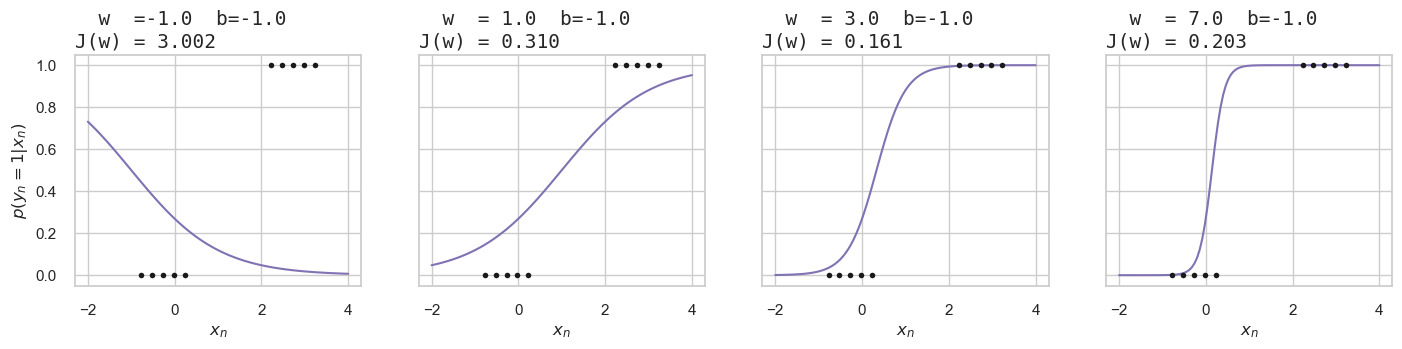

In [76]:
w_candidates_A = [-1., 1, 3, 7]

A = len(w_candidates_A)
fig, axgrid = plt.subplots(nrows=1, ncols=A, figsize=(4*A+1,3), sharex=True, sharey=True)

L = 101
xdense_L = np.linspace(-2, 4, L)
xdense_L1 = xdense_L[:,np.newaxis]

tmplr = LogisticRegressionGradientDescent(C=1000.0)

for aa in range(len(w_candidates_A)):
    curw = w_candidates_A[aa]
    
    # Hard-code the values of wtil_G so they reflect current w value
    tmplr.wtil_G = np.asarray([curw, fixedb]);
    
    # Evaluate phat with current wtil_G, across L different dense x values
    phat_L = tmplr.predict_proba(xdense_L1)[:,1]

    # Show predicted phat probability alongside true labels
    axgrid[aa].plot(xdense_L, phat_L, 'm-');
    axgrid[aa].plot(x_NF[:,0], y_N, 'k.', markersize=8);
    
    # Make pretty title to help with debugging
    curJ = tmplr.calc_loss(tmplr.wtil_G, xone_NG, y_N)
    panel = axgrid[aa]
    panel.set_title('  w  =% .1f  b=%.1f\nJ(w) = %.3f ' % (curw, fixedb, curJ),
                         x=0.0,
                         font='monospace', fontsize=14,
                         horizontalalignment='left')
    panel.set_xticks([-2, 0, 2, 4]);
    panel.set_xlabel(r'$x_n$')
    if aa == 0:
        panel.set_ylabel(r'$p(y_n=1 | x_n)$');

## Step 1A: Evaluate loss and grad across dense grid of w values

This prepares for Fig 1a

In [77]:
fixedb = -1

In [78]:
xone_NG = insert_final_col_of_all_ones(x_NF)
G = xone_NG.shape[1]

In [79]:
mylr = LogisticRegressionGradientDescent(C=10.0)

In [80]:
## Perform numerical search over a fine grid of w values
H = 201 # num grid points
w_grid_H = np.linspace(-2, 11, H)
loss_grid_H = np.zeros_like(w_grid_H)
grad_grid_H = np.zeros_like(w_grid_H)

for hh in range(H):
    wtil_G = np.asarray([w_grid_H[hh], fixedb])
    loss = mylr.calc_loss(wtil_G, xone_NG, y_N)
    grad_G = mylr.calc_grad(wtil_G, xone_NG, y_N)
    loss_grid_H[hh] = loss
    grad_grid_H[hh] = grad_G[0]


## Figure 1a: Loss and Grad vs w

If your calc_loss and calc_grad implementations are correct, you shouldn't need to edit anything in this block

This block helps visualize loss J and its grad as a function of w

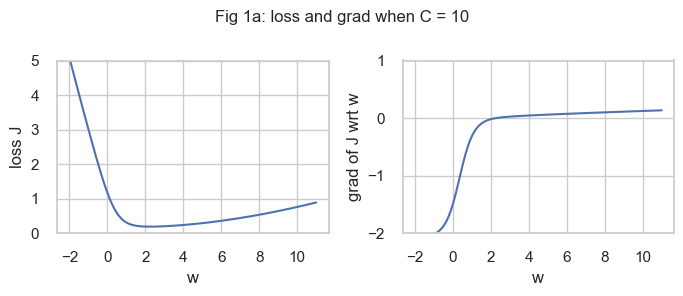

In [81]:
fig, axgrid = plt.subplots(nrows=1, ncols=2, figsize=(7,3), sharex=True, sharey=False)

loss_panel = axgrid[0]
loss_panel.plot(w_grid_H, loss_grid_H, 'b-');
loss_panel.set_ylim([0.0, 5.0]);
loss_panel.set_xticks([-2, 0, 2, 4, 6, 8, 10]);
loss_panel.set_xlabel('w')
loss_panel.set_ylabel('loss J')

grad_panel = axgrid[1]
grad_panel.plot(w_grid_H, grad_grid_H, 'b-');
grad_panel.set_ylim([-2, 1]);
grad_panel.set_yticks([-2, -1, 0, 1]);
grad_panel.set_xlabel('w')
grad_panel.set_ylabel('grad of J wrt w')

plt.suptitle("Fig 1a: loss and grad when C = %.3g" % mylr.C, fontsize=12);

plt.tight_layout();

## Caption of Fig 1a: Part 1

Write in report. See instructions.

## Caption of Fig 1a: Part 2

TODO find the values in w_grid_H that correspond to lowest loss value in loss_grid_H 

Make sure the answer here gets moved to your report

In [ ]:
# Find the index of the minimum loss value
min_loss_idx = np.argmin(loss_grid_H)

# Find the corresponding w value
min_loss_w = w_grid_H[min_loss_idx]

# Define a tighter interval around the minimum loss w value
interval_radius = 0.1
lower_bound = max(min_loss_w - interval_radius, w_grid_H.min())
upper_bound = min(min_loss_w + interval_radius, w_grid_H.max())

print("Lowest value is between %.3f and %.3f" % (lower_bound, upper_bound))

Lowest value is between 2.190 and 2.390


## Step 1B

Using this toy data, `init_w_recipe='zeros'` and call `fit` with an appropriate step size to run gradient descent. Be sure to verify convergence. If it doesn't converge, adjust your step size accordingly. 


In [ ]:
mylr_fromzeros = LogisticRegressionGradientDescent(
    C=50., init_recipe='zeros', step_size=20)
mylr_fromzeros.fit(xone_NG, y_N)

Initializing G=3 parameters in wtil_G via recipe: zeros
Running GD for up to 999 iters with step_size 20
iter   0/999  loss   1.000000  avg_abs_grad   0.360674  w   0.000 b   0.000
iter   1/999  loss   1.259923  avg_abs_grad   0.158639  w  21.640 b   0.000
iter   2/999  loss   0.426555  avg_abs_grad   0.016462  w  20.141 b  -4.009
iter   3/999  loss   0.392457  avg_abs_grad   0.015797  w  19.313 b  -4.104
iter   4/999  loss   0.361311  avg_abs_grad   0.015170  w  18.523 b  -4.181
iter   5/999  loss   0.332759  avg_abs_grad   0.014573  w  17.768 b  -4.246
iter   6/999  loss   0.306538  avg_abs_grad   0.014002  w  17.044 b  -4.302
iter   7/999  loss   0.282431  avg_abs_grad   0.013456  w  16.351 b  -4.352
iter   8/999  loss   0.260254  avg_abs_grad   0.012932  w  15.687 b  -4.396
iter   9/999  loss   0.239843  avg_abs_grad   0.012429  w  15.050 b  -4.437
iter  10/999  loss   0.221053  avg_abs_grad   0.011946  w  14.440 b  -4.474
iter  11/999  loss   0.203751  avg_abs_grad   0.011482  w  

## Step 1B part two: trace plotting

Edit the function below to make sure you are plotting the history of your gradient descent run. 

Only lines marked TODO need to be edited.

Please don't mess with the styling or ylims if at all possible.
If you find yourself messing with those, it may indicate a bug.

In [84]:
def make_trace_plots(mylr, figsize=(11,3),
                    loss_ylims=[-0.01, 0.2],
                    grad_ylims=[-0.01, 0.2],
                    param_ylims=[-10, 12],
                    xtick_every=100,
                    ):
    fig, axgrid = plt.subplots(
        nrows=1, ncols=3, figsize=figsize, sharex=True, sharey=False);
    loss_panel = axgrid[0]
    grad_panel = axgrid[1]
    param_panel = axgrid[2]
    try:
        xmax = np.max(mylr.trace_steps)
    except AttributeError:
        xmax = 100
    
    # Plot loss as function of iteration
    loss_panel.plot(mylr.trace_steps, mylr.trace_loss, 'm'); # Using trace_* attributes of mylr
    loss_panel.set_ylim(loss_ylims);
    loss_panel.set_xlabel('iter');
    loss_panel.set_ylabel('loss J');
    loss_panel.set_xticks(np.arange(0, xmax, xtick_every));
    
    # Plot L1 norm of grad as function of iteration
    grad_panel.plot(mylr.trace_steps, mylr.trace_grad_L1_norm, 'm'); # Using trace_* attributes of mylr
    grad_panel.set_ylim(grad_ylims);
    grad_panel.set_xlabel('iter');
    grad_panel.set_ylabel('sum(abs(grad_G))')
    
    # Plot parameter values as function of iteration
    step_list = mylr.trace_steps  # Using actual steps from tracing
    w_list = [param[0] for param in mylr.trace_param]  # Extract weights from trace_param
    b_list = [param[-1] for param in mylr.trace_param]  # Extract biases from trace_param
    param_panel.plot(step_list, w_list, 'b', label='w')
    param_panel.plot(step_list, b_list, 'r', label='b')    
    param_panel.legend(loc='upper right');
    param_panel.set_xlabel('iter');
    param_panel.set_ylim(param_ylims);
    param_panel.set_ylabel('param. val.')
    
    plt.tight_layout();

## Figure 1b: Trace plots for from-zeros run

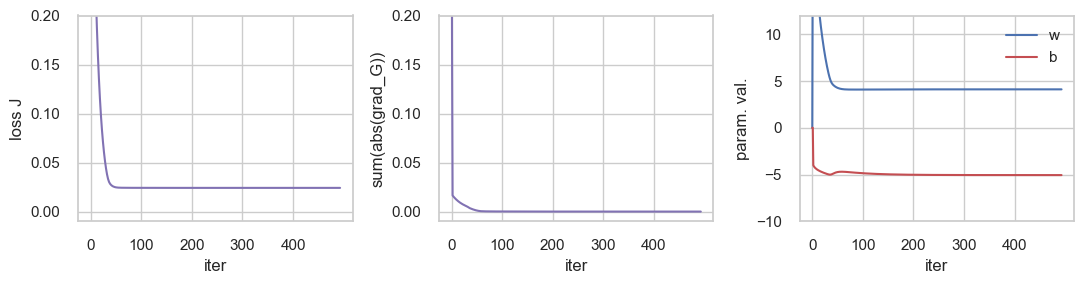

In [85]:
make_trace_plots(mylr_fromzeros)

TODO in your report: **In a brief caption**, indicate the `step_size` used and why you picked that value.


FYI as a bonus exercise for your own understanding, you could try calling fit using a different initialization (random), and compare the trace plots of that call to the ones above.

## Step 1C: Verify your implementation matches sklearn

Setup numpy so we print out arrays nicely to only 3 decimal places

In [86]:
def pprint_float(fval):
    return '% .3f' % fval

pretty_formatter = {'float': pprint_float}
np.set_printoptions(formatter=pretty_formatter)


In [ ]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegression

row_list = list()

for C in [500.0, 5.0, 0.005]:
    sklr = LogisticRegression(C=C, max_iter=999, solver='lbfgs', random_state=0)
    sklr.fit(x_NF, y_N)
    
    # Unpacking learned weights from coef_
    sklr_wtil_G = sklr.coef_.flatten()
    
    # Unpacking learned bias coef from intercept_
    sklr_loss = sklr.intercept_[0]
    
    # Stash these sklearn values so we can later build sklearn rows of Table 1c
    row_dict = {'C':C, 'method':'sklearn',
                'wtil_G':str(sklr_wtil_G),
                'loss':sklr_loss,
                'solver_status':'',
               }
    row_list.append(row_dict)    
    
    step_size = 1
    if C == 500.0:
        step_size = 100
    elif C == 5.0:
        step_size =1
    else:  # C == 0.005
        step_size = 0.05
    mylr = LogisticRegressionGradientDescent(
        C=C, 
        step_size=step_size,
        use_base2_for_BCE=False, # Using base-e ensures we match sklearn exactly
        num_iterations=999,
        verbose=False,           # You may set verbose=True to better adjust step_size
        )
    mylr.fit(x_NF, y_N)
    mylr_wtil_G = mylr.wtil_G[0]  # Unpacking learned weights from the model
    mylr_loss =  mylr.wtil_G[1]   # Assuming this is the loss metric you want to use

    # Stash these values so we can later build 'my code' rows of Table 1c
    row_dict = {'C':C, 'method':'my code',
                'wtil_G':str(mylr_wtil_G),
                'loss':mylr_loss,
                'solver_status':mylr.solver_status,
               }
    row_list.append(row_dict)
    
    print("C = % 9.3f" % C)
    print(mylr.solver_status)

C =   500.000
Done. Converged after 592 iters with step_size 100
C =     5.000
Done. Converged after 462 iters with step_size 1
C =     0.005
Done. Converged after 380 iters with step_size 0.05


## Table 1c

In [88]:
# Convert the rows assembed above into a pandas DataFrame
df = pd.DataFrame(row_list)

Pretty print the pandas data frame as an HTML table.
You can copy this into your report.

In [89]:
pd.set_option('display.max_colwidth', 200)
from IPython.core.display import HTML
HTML(df.to_html(index=False))

C,method,wtil_G,loss,solver_status
500.000,sklearn,[ 5.556],-6.832307,
500.000,my code,5.55479549739234,-6.832405,Done. Converged after 592 iters with step_size 100
5.000,sklearn,[ 2.360],-2.903265,
5.000,my code,2.3602095459633317,-2.902964,Done. Converged after 462 iters with step_size 1
0.005,sklearn,[ 0.036],-0.044818,
0.005,my code,0.03641296512102385,-0.044379,Done. Converged after 380 iters with step_size 0.05


If needed, here's a plain text version of the table you could also include in your report.

In [90]:
print(df.to_string(index=False))

      C  method              wtil_G      loss                                       solver_status
500.000 sklearn            [ 5.556] -6.832307                                                    
500.000 my code    5.55479549739234 -6.832405  Done. Converged after 592 iters with step_size 100
  5.000 sklearn            [ 2.360] -2.903265                                                    
  5.000 my code  2.3602095459633317 -2.902964    Done. Converged after 462 iters with step_size 1
  0.005 sklearn            [ 0.036] -0.044818                                                    
  0.005 my code 0.03641296512102385 -0.044379 Done. Converged after 380 iters with step_size 0.05


### Short answer 1d

See instructions on webpage. Write answer in your report